In [54]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import seaborn as sns
import pandas as pd
import json
import numpy as np

sns.set_theme(style="whitegrid")
mpl.rcParams['savefig.dpi'] = 300
fsize = 15
plt.rc('font', size=10) #controls default text size
plt.rc('axes', titlesize=fsize) #fontsize of the title
plt.rc('axes', labelsize=fsize) #fontsize of the x and y labels
plt.rc('xtick', labelsize=fsize) #fontsize of the x tick labels
plt.rc('ytick', labelsize=fsize) #fontsize of the y tick labels
plt.rc('legend', fontsize=fsize) #fontsize of the legend

In [55]:
files = ['copyT_mn', 'copyT_mn_nosep', 'copyT_mx', 'copyT_mx_nosep', 
'oriT_mn', 'oriT_mn_nosep', 'oriT_mx', 'oriT_mx_nosep',
'ht_docl_mn', 'ht_docl_mn_nosep', 'ht_docl_mx', 'ht_docl_mx_nosep',
'ht_sent_mx', 'ht_sent_mx_nosep', 'ht_sent_mn', 'ht_sent_mn_nosep'
]

formalNames = {'copyT_mn':'CT-News', 'copyT_mn_nosep':'CT-News_nosep', 'copyT_mx':'CT-XScience', 'copyT_mx_nosep':'CT-XScience_nosep',
'oriT_mn':'VT-News', 'oriT_mn_nosep':'VT-News_nosep', 'oriT_mx':'VT-XScience', 'oriT_mx_nosep':'VT-XScience_nosep',
'ht_docl_mn':'HT-News (doc)', 'ht_docl_mn_nosep':'HT-News_nosep (doc)', 'ht_docl_mx':'HT-XScience (doc)', 'ht_docl_mx_nosep':'HT-XScience_nosep (doc)',
'ht_sent_mn':'HT-News (sent)', 'ht_sent_mn_nosep':'HT-News_nosep (sent)', 'ht_sent_mx':'HT-XScience (sent)', 'ht_sent_mx_nosep':'HT.-XScience_nosep (sent)'
}

In [56]:
name = []
r_1_p = []
r_1_r = []
r_1_f = []

r_2_p = []
r_2_r = []
r_2_f = []

r_l_p = []
r_l_r = []
r_l_f = []

r_su_p = []
r_su_r = []
r_su_f = []

r_we_p = []
r_we_r = []
r_we_f = []

bleu = []

s3_pyr = []
s3_resp = []

bert_p = []
bert_r = []
bert_f = []

rel = []
red = []

In [57]:
for file in files:
    with open(file + ".json", 'r') as f:
        results = json.load(f)

        name.append(file)

        r_1_p.append(results['rouge']['rouge']['rouge_1_precision'])
        r_1_r.append(results['rouge']['rouge']['rouge_1_recall'])
        r_1_f.append(results['rouge']['rouge']['rouge_1_f_score'])

        r_2_p.append(results['rouge']['rouge']['rouge_2_precision'])
        r_2_r.append(results['rouge']['rouge']['rouge_2_recall'])
        r_2_f.append(results['rouge']['rouge']['rouge_2_f_score'])

        r_l_p.append(results['rouge']['rouge']['rouge_l_precision'])
        r_l_r.append(results['rouge']['rouge']['rouge_l_recall'])
        r_l_f.append(results['rouge']['rouge']['rouge_l_f_score'])

        r_su_p.append(results['rouge']['rouge']['rouge_su*_precision'])
        r_su_r.append(results['rouge']['rouge']['rouge_su*_recall'])
        r_su_f.append(results['rouge']['rouge']['rouge_su*_f_score'])

        r_we_p.append(results['rouge_we']['rouge_we_3_p'])
        r_we_r.append(results['rouge_we']['rouge_we_3_r'])
        r_we_f.append(results['rouge_we']['rouge_we_3_f'])

        bleu.append(results['blue']['bleu'])

        s3_pyr.append(results['s3']['s3_pyr'])
        s3_resp.append(results['s3']['s3_resp'])

        bert_p.append(results['bert']['bert_score_precision'])
        bert_r.append(results['bert']['bert_score_recall'])
        bert_f.append(results['bert']['bert_score_f1'])

        rel.append(results['relevance']['relevance'])
        red.append(results['redundancy']['redundancy'])
    # break

rel = np.array(rel)
red = np.array(red)
bleu = np.array(bleu)
df = pd.DataFrame(
    {"name": [formalNames[file] for file in name],
    "r_1_p": r_1_p, "r_1_r": r_1_r, "r_1_f": r_1_f,
    "r_2_p": r_2_p, "r_2_r": r_2_r, "r_2_f": r_2_f,
    "r_l_p": r_l_p, "r_l_r": r_l_r, "r_l_f": r_l_f,
    "r_su_p": r_su_p, "r_su_r": r_su_r, "r_su_f": r_su_f,
    "r_we_p": r_we_p, "r_we_r": r_we_r, "r_we_f": r_we_f,
    "bleu": (bleu-bleu.min()) / (bleu.max()-bleu.min()),
    "s3_pyr": s3_pyr, "s3_resp": s3_resp,
    "bert_p": bert_p, "bert_r": bert_r, "bert_f": bert_f,
    "relevance": (rel-rel.min()) / (rel.max()-rel.min()),
    "redundancy": (red-red.min()) / (red.max()-red.min())
    })

In [58]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(df)

In [59]:
# columns_1 = ['r_1_f', 'r_2_f', 'r_l_f', 'r_su_f', 'r_we_f', 'bert_f', 'bleu', 's3_pyr', 's3_resp', 'relevance', 'redundancy']
# # palette = iter())
# rows1 = [formalNames[file] for file in ['copyT_mx', 'oriT_mx', 'ht_docl_mx']] #'copyT_mx_nosep', 'oriT_mx_nosep', 'ht_docl_mx_nosep']
# f = len(columns_1)
# ylim = (0,1)

# fig, axs = plt.subplots(f, 2, figsize=(10,20))
# for i in range(0, f):
#     ax = axs[i][0]
#     ax = sns.lineplot(x="name", y=columns_1[i], data=df.loc[df.name.isin(rows1)], ax=ax, palette='pastel', marker='o')
#     # ax.set_ylim(ylim)

#     if i != f-1:
#         ax.set(xticklabels=[])
#         ax.set(xlabel=None)
#     else:
#         ax.set_xticklabels(rows1, rotation=90)

# rows2 = [formalNames[file] for file in ['copyT_mn', 'oriT_mn', 'ht_docl_mn']] # 'copyT_mn_nosep', 'oriT_mn_nosep', 'ht_docl_mn_nosep']
# for i in range(0, f):
#     ax = axs[i][1]
#     ax = sns.lineplot(x="name", y=columns_1[i], data=df.loc[df.name.isin(rows2)], ax=ax, palette='pastel', marker='o', size=5)
#     # ax.set_ylim(ylim)

#     if i != f-1:
#         ax.set(xticklabels=[]) 
#         ax.set(xlabel=None)
#     else:
#         ax.set_xticklabels(rows2, rotation=90)

# plt.show()

In [60]:
def label_point(x,y,id,ax):
  df_tmp=pd.concat({'x':x,'y':y,'id':id}, axis='columns')
  for i, point in df_tmp.iterrows():
    ax.text(point['x'], point['y']+0.1, np.round(point['id'], decimals=4), fontsize=12)

C:\Users\hmkg1\AppData\Local\Temp\ipykernel_23268\2999277785.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(rows1, rotation=40)
C:\Users\hmkg1\AppData\Local\Temp\ipykernel_23268\2999277785.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(rows2, rotation=40)
C:\Users\hmkg1\AppData\Local\Temp\ipykernel_23268\2999277785.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


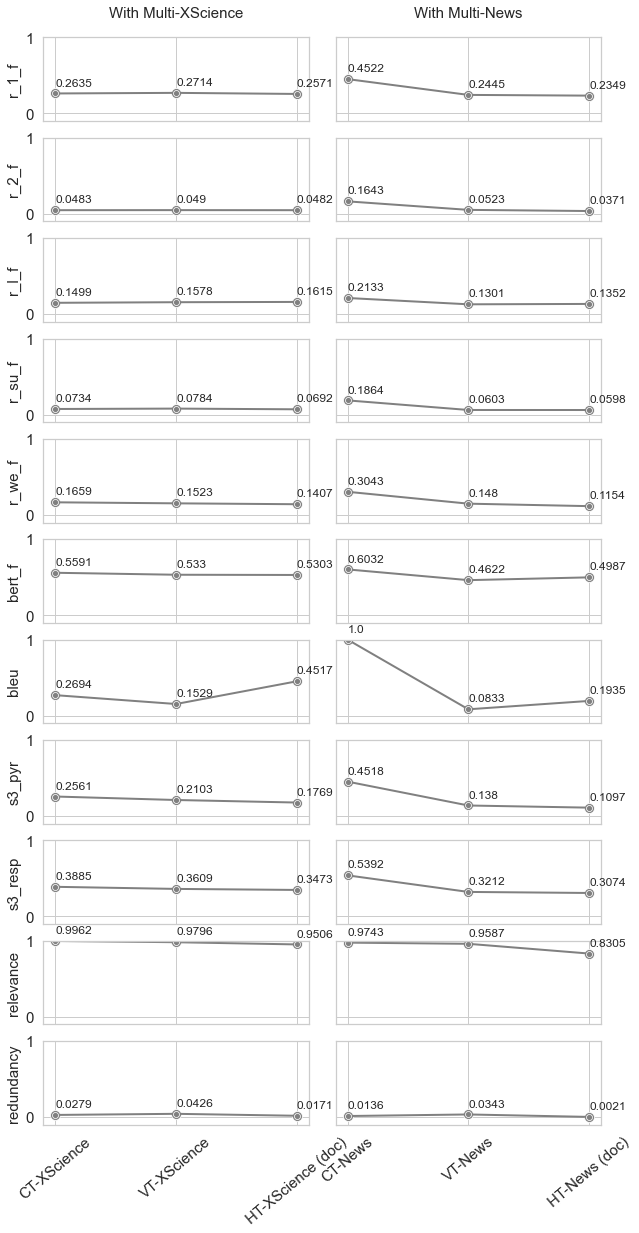

In [61]:
# sns.set_palette('hls')
# sns.set_palette('hls')
columns_1 = ['r_1_f', 'r_2_f', 'r_l_f', 'r_su_f', 'r_we_f', 'bert_f', 'bleu', 's3_pyr', 's3_resp', 'relevance', 'redundancy']
# palette = iter(sns.color_palette("Set2"))
rows1 = [formalNames[file] for file in ['copyT_mx', 'oriT_mx', 'ht_docl_mx']] #'copyT_mx_nosep', 'oriT_mx_nosep', 'ht_docl_mx_nosep']
f = len(columns_1)
ylim = (-0.1, 1)
fig = plt.figure(figsize=(10, 20))
outer = gridspec.GridSpec(1, 2, wspace=0.1, hspace=0.1)

inner = gridspec.GridSpecFromSubplotSpec(f, 1, subplot_spec=outer[0])
ax = plt.Subplot(fig, outer[0])
ax.set_title("With Multi-XScience", fontsize=15, pad=20)
ax.axis('off')
fig.add_subplot(ax)

for i in range(0, f):
    ax = plt.Subplot(fig, inner[i])
    sns.lineplot(x="name", y=columns_1[i], data=df.loc[df.name.isin(rows1)], ax=ax, marker='o', color='gray', linewidth=2, linestyle='-')
    sns.scatterplot(x="name", y=columns_1[i], data=df.loc[df.name.isin(rows1)], ax=ax, markers=True, s=100, color='gray')
    label_point(df.loc[df.name.isin(rows1), 'name'], df.loc[df.name.isin(rows1), columns_1[i]], df.loc[df.name.isin(rows1), columns_1[i]], ax)
    ax.set_ylim(ylim)
    fig.add_subplot(ax)
    
    if i != f-1:
        ax.set(xticklabels=[]) 
        ax.set(xlabel=None)
    else:
        ax.set_xticklabels(rows1, rotation=40)
ax.set(xlabel=None)
# ------------------------------------------------------------------
rows2 = [formalNames[file] for file in ['copyT_mn', 'oriT_mn', 'ht_docl_mn']] # 'copyT_mn_nosep', 'oriT_mn_nosep', 'ht_docl_mn_nosep']
inner = gridspec.GridSpecFromSubplotSpec(f, 1, subplot_spec=outer[1])
ax = plt.Subplot(fig, outer[1])
ax.set_title("With Multi-News", fontsize=15, pad=20)
ax.axis('off')
fig.add_subplot(ax)

for i in range(0, f):
    ax = plt.Subplot(fig, inner[i])
    sns.lineplot(x="name", y=columns_1[i], data=df.loc[df.name.isin(rows2)], ax=ax, marker='o', color='gray', linewidth=2, linestyle='-')
    sns.scatterplot(x="name", y=columns_1[i], data=df.loc[df.name.isin(rows2)], ax=ax, markers=True, s=100, color='gray')
    label_point(df.loc[df.name.isin(rows2), 'name'], df.loc[df.name.isin(rows2), columns_1[i]], df.loc[df.name.isin(rows2), columns_1[i]], ax)
    ax.set_ylim(ylim)
    fig.add_subplot(ax)
    ax.set(ylabel=None)
    ax.set(yticklabels=[]) 

    if i != f-1:
        ax.set(xticklabels=[]) 
        ax.set(xlabel=None)
    else:
        ax.set_xticklabels(rows2, rotation=40)
ax.set(xlabel=None)

plt.tight_layout()
plt.savefig('overall.svg', bbox_inches='tight', pad_inches=0)
plt.show()

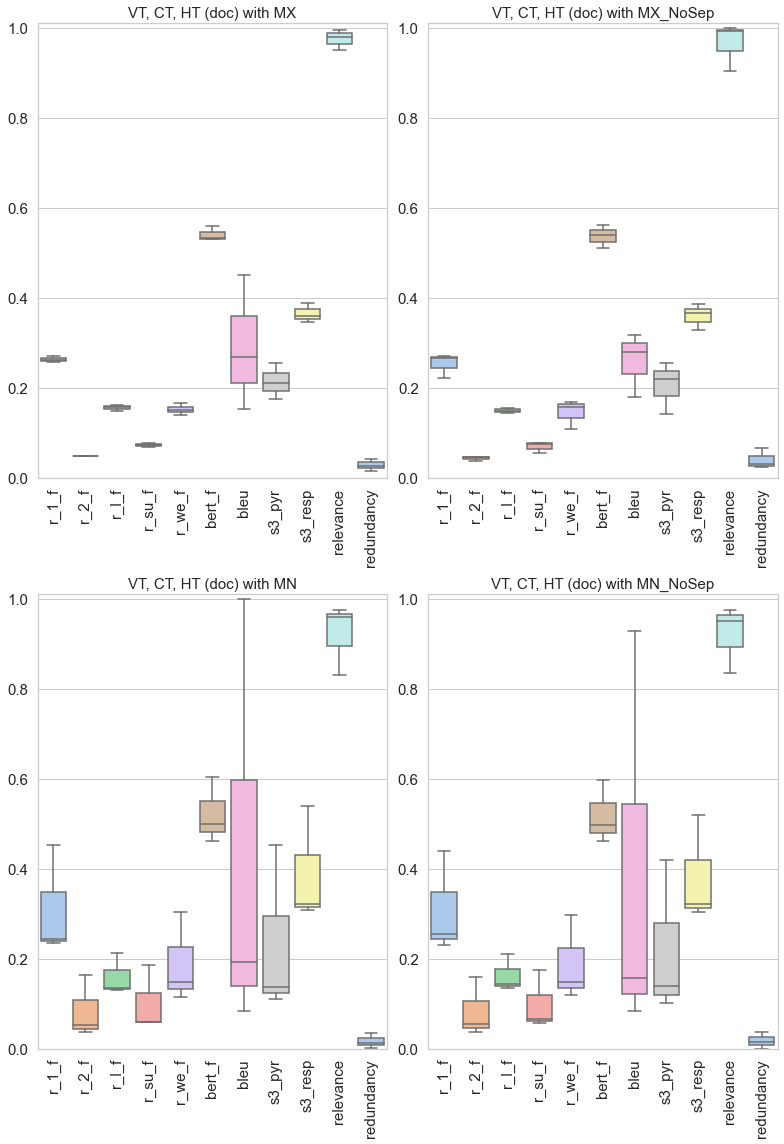

In [62]:
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(11,16))
columns = ['r_1_f', 'r_2_f', 'r_l_f', 'r_su_f', 'r_we_f', 'bert_f', 'bleu', 's3_pyr', 's3_resp',
'relevance', 'redundancy']


rows1 = [formalNames[file] for file in ['copyT_mx', 'oriT_mx', 'ht_docl_mx']]
rows2 = [formalNames[file] for file in ['copyT_mx_nosep', 'oriT_mx_nosep', 'ht_docl_mx_nosep']]

sns.boxplot(data=df.loc[df.name.isin(rows1), columns], palette="pastel", ax=ax1[0])
sns.boxplot(data=df.loc[df.name.isin(rows2), columns], palette="pastel", ax=ax1[1])

ax1[0].set_ylim(0, 1.01)
ax1[1].set_ylim(0, 1.01)
ax1[0].set_xticklabels(ax1[0].get_xticklabels(), rotation=90)
ax1[1].set_xticklabels(ax1[1].get_xticklabels(), rotation=90)

ax1[0].set_title("VT, CT, HT (doc) with MX")
ax1[1].set_title("VT, CT, HT (doc) with MX_NoSep")
# ---------------------------------------------------------------------

rows1 = [formalNames[file] for file in ['copyT_mn', 'oriT_mn', 'ht_docl_mn']]
rows2 = [formalNames[file] for file in ['copyT_mn_nosep', 'oriT_mn_nosep', 'ht_docl_mn_nosep']]

sns.boxplot(data=df.loc[df.name.isin(rows1), columns], palette="pastel", ax=ax2[0])
sns.boxplot(data=df.loc[df.name.isin(rows2), columns], palette="pastel", ax=ax2[1])

# ax1.set_ylim(-0.45, 0.83)
ax2[0].set_ylim(0, 1.01)
ax2[1].set_ylim(0, 1.01)
ax2[0].set_xticklabels(ax2[0].get_xticklabels(), rotation=90)
ax2[1].set_xticklabels(ax2[1].get_xticklabels(), rotation=90)

ax2[0].set_title("VT, CT, HT (doc) with MN")
ax2[1].set_title("VT, CT, HT (doc) with MN_NoSep")

plt.tight_layout()
plt.savefig('nosep.svg', pad_inches=0)
plt.show()

In [63]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,10))
# columns = ['r_1_f', 'r_2_f', 'r_l_f', 'r_su_f', 'r_we_f', 'bert_f', 'bleu', 's3_pyr', 's3_resp',
# 'relevance', 'redundancy']
# rows1 = [formalNames[file] for file in ['copyT_mx', 'oriT_mx', 'ht_docl_mx', 'ht_sent_mx']]
# rows2 = [formalNames[file] for file in ['copyT_mx_nosep', 'oriT_mx_nosep', 'ht_docl_mx_nosep', 'ht_sent_mx_nosep']]

# ax1 = sns.boxplot(data=df.loc[df.name.isin(rows1), columns], palette="pastel", ax=ax1)
# ax2 = sns.boxplot(data=df.loc[df.name.isin(rows2), columns], palette="pastel", ax=ax2)

# ax1.set_ylim(-0.23, 0.58)
# ax2.set_ylim(-0.23, 0.58)
# ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
# ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
# plt.show()

In [64]:
# palette = iter(sns.color_palette("pastel"))
# # fig, ax = plt.subplots(1, 1, figsize=(14,10))

# # Generate an example radial datast
# # r = np.linspace(0, 10, num=8)
# # df1 = pd.DataFrame({'r': r, 'slow': r, 'medium': 2 * r, 'fast': 4 * r})

# # Set up a grid of axes with a polar projection
# g = sns.FacetGrid(df, subplot_kws=dict(projection='polar'), height=4.5, sharex=False, sharey=False, despine=False, size=8, aspect=1)

# # Draw a scatterplot onto each axes in the grid
# g.map(sns.lineplot, "name", "r_1_f", color=next(palette))
# g.map(sns.lineplot, "name", "r_2_f", color=next(palette))
# g.map(sns.lineplot, "name", "r_l_f", color=next(palette))
# plt.show()

In [65]:
def theta(rows, ax, title):
    columns = ['r_1_f', 'r_2_f', 'r_l_f', 'r_su_f', 'r_we_f', 'bert_f', 'bleu', 's3_pyr', 's3_resp', 'relevance', 'redundancy', ""]
    rows = rows

    # fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'polar'}, figsize=(18,8))
    lines, labels = plt.thetagrids(np.linspace(0, 360, 12), labels=columns, fmt=None)
    leg = []
    for row in rows:
        rows1 = [formalNames[file] for file in [row]]
        d1=df.loc[df.name.isin(rows1), columns[:-1]]
        actual = np.r_[d1.values[0], d1.values[0][0]]
        theta = np.linspace(0, 2 * np.pi, len(actual))
        ax.plot(theta, actual, marker='o', alpha=0.8, linewidth=4)
        leg.append(rows1[0])
    # ax.set_rmax(2)
    # ax.set_rticks([0.5, 1])  # Less radial ticks
    # ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
    ax.grid(True)
    ax.spines['polar'].set_visible(False)

    ax.set_title(title, va='bottom')
    ax.legend(labels=(leg), loc='upper center', bbox_to_anchor=(0.5, -0.08),  fancybox=True, ncol=2)

In [66]:
# plt.style.available

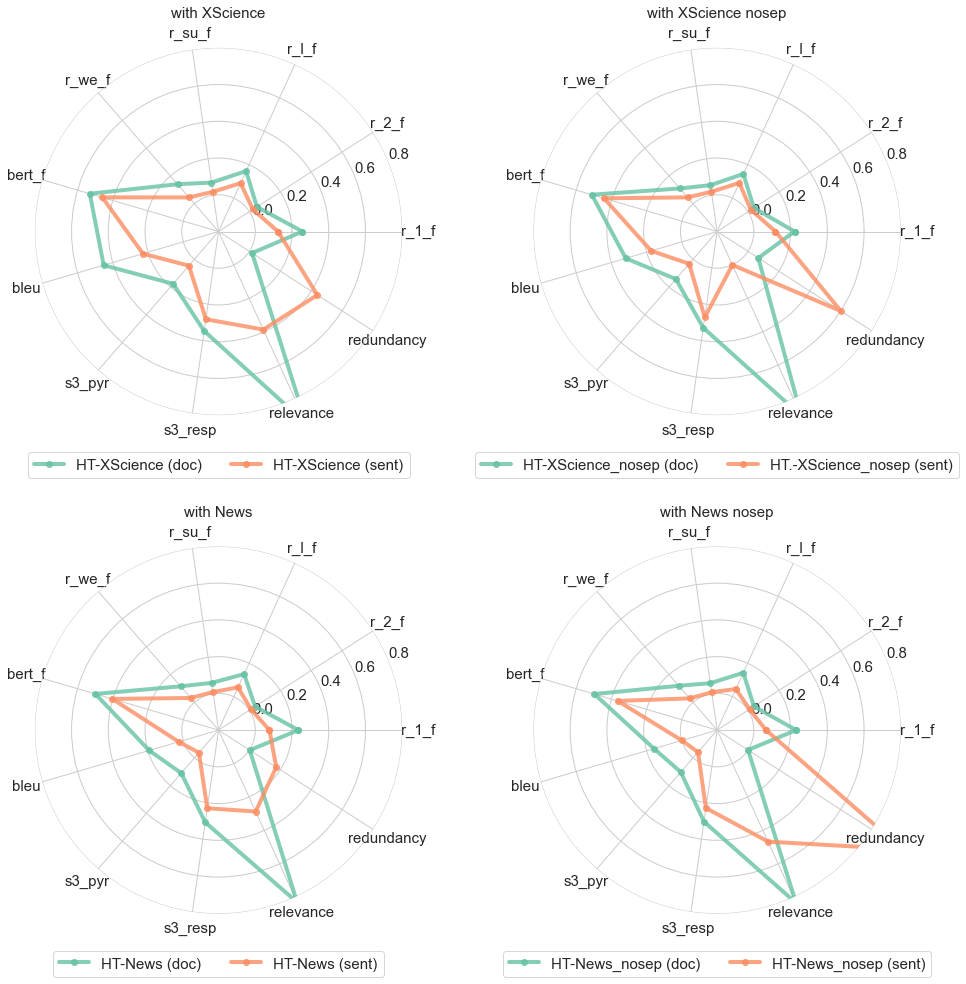

In [67]:
# plt.style.use('seaborn-deep')
sns.set_palette('Set2')
fig = plt.figure(figsize=(14,14))

fig.subplots_adjust(wspace=0.5, hspace=0.1)
ax1 = fig.add_subplot(221, polar=True)
theta(['ht_docl_mx', 'ht_sent_mx'], ax1, "with XScience")
ax2 = fig.add_subplot(222, polar=True)
theta(['ht_docl_mx_nosep', 'ht_sent_mx_nosep'], ax2, "with XScience nosep")

ax3 = fig.add_subplot(223, polar=True)
theta(['ht_docl_mn', 'ht_sent_mn'], ax3, "with News")

ax4 = fig.add_subplot(224, polar=True)
theta(['ht_docl_mn_nosep', 'ht_sent_mn_nosep'], ax4, "with News nosep")

ylim = (-0.2, 0.8)
ax1.set_ylim(ylim)
ax2.set_ylim(ylim)
ax3.set_ylim(ylim)
ax4.set_ylim(ylim)
plt.tight_layout()
plt.savefig("doc_sent.svg", pad_inches=0)
plt.show() 

In [68]:
df.head()

,name,r_1_p,r_1_r,r_1_f,r_2_p,r_2_r,r_2_f,r_l_p,r_l_r,r_l_f,...,r_we_r,r_we_f,bleu,s3_pyr,s3_resp,bert_p,bert_r,bert_f,relevance,redundancy
0,CT-News,0.50176,0.43709,0.45221,0.18123,0.15941,0.16427,0.23811,0.20690,0.21327,...,0.302589,0.304259,1.000000,0.451850,0.539163,0.604256,0.604822,0.603162,0.974299,0.013635
1,CT-News_nosep,0.51755,0.40784,0.43948,0.18614,0.14856,0.15939,0.24992,0.19614,0.21071,...,0.285389,0.297114,0.928429,0.420236,0.518127,0.602621,0.595130,0.597229,0.975035,0.015397
2,CT-XScience,0.40178,0.25228,0.26354,0.07520,0.04655,0.04826,0.24968,0.14281,0.14991,...,0.185831,0.165912,0.269385,0.256111,0.388461,0.555777,0.565554,0.559102,0.996186,0.027870
3,CT-XScience_nosep,0.36326,0.26802,0.27129,0.06270,0.04634,0.04678,0.21334,0.14835,0.15018,...,0.187041,0.170186,0.280688,0.255434,0.386057,0.559417,0.567165,0.562066,1.000000,0.024005
4,VT-News,0.52623,0.18516,0.24446,0.11964,0.03912,0.05226,0.30826,0.09692,0.13011,...,0.156880,0.148044,0.083349,0.138025,0.321174,0.434706,0.501963,0.462152,0.958739,0.034254


In [16]:
formalNames = {'copyT_mn':'CT-News', 'copyT_mn_nosep':'CT-News_nosep', 'copyT_mx':'CT-XScience', 'copyT_mx_nosep':'CT-XScience_nosep',
'oriT_mn':'VT-News', 'oriT_mn_nosep':'VT-News_nosep', 'oriT_mx':'VT-XScience', 'oriT_mx_nosep':'VT-XScience_nosep',
'ht_docl_mn':'HT-News (doc)', 'ht_docl_mn_nosep':'HT-News_nosep (doc)', 'ht_docl_mx':'HT-XScience (doc)', 'ht_docl_mx_nosep':'HT-XScience_nosep (doc)',
'ht_sent_mn':'HT-News (sent)', 'ht_sent_mn_nosep':'HT-News_nosep (sent)', 'ht_sent_mx':'HT-XScience (sent)', 'ht_sent_mx_nosep':'HT.-XScience_nosep (sent)'
}

In [53]:
rows1_comp = ['oriT_mn', 'copyT_mn', 'ht_docl_mn']
# rows1_comp = ['oriT_mn_nosep', 'copyT_mn_nosep', 'ht_docl_mn_nosep']

rows1_comp = [formalNames[file] for file in rows1_comp]
df2 = df.loc[df.name.isin(rows1_comp), :]

for col in columns:
    maxId = df2[col].idxmax()
    minId = df2[col].idxmin()
    print(col)
    print(df2.loc[maxId, 'name'])
    print(df2.loc[minId, 'name'])
    print(df2.loc[maxId, col], "-", df2.loc[minId, col], "=",  df2.loc[maxId, col] - df2.loc[minId, col], "\n")

r_1_f
CT-News
HT-News (doc)
0.45221 - 0.23494 = 0.21727 

r_2_f
CT-News
HT-News (doc)
0.16427 - 0.03708 = 0.12719 

r_l_f
CT-News
VT-News
0.21327 - 0.13011 = 0.08315999999999998 

r_su_f
CT-News
HT-News (doc)
0.18638 - 0.05984 = 0.12653999999999999 

r_we_f
CT-News
HT-News (doc)
0.30425887315554384 - 0.11539435817423792 = 0.1888645149813059 

bert_f
CT-News
VT-News
0.6031622886657715 - 0.4621520936489105 = 0.14101019501686096 

bleu
CT-News
VT-News
14.807672184059863 - 2.0054290452856507 = 12.802243138774212 

s3_pyr
CT-News
HT-News (doc)
0.4518497330445912 - 0.10974218869808679 = 0.3421075443465044 

s3_resp
CT-News
HT-News (doc)
0.5391625442230296 - 0.3074242068592047 = 0.23173833736382488 

relevance
CT-News
HT-News (doc)
-6.241210462497069 - -17.151996366300846 = 10.910785903803777 

redundancy
VT-News
HT-News (doc)
-5.76741390830077 - -12.280480916185105 = 6.513067007884335 



In [37]:
rows1_comp = ['oriT_mx', 'copyT_mx', 'ht_docl_mx']
rows2_comp = ['oriT_mx_nosep', 'copyT_mx_nosep', 'ht_docl_mx_nosep']

# rows1_comp = ['oriT_mn', 'copyT_mn', 'ht_docl_mn']
# rows2_comp = ['oriT_mn_nosep', 'copyT_mn_nosep', 'ht_docl_mn_nosep']

rows1_comp = [formalNames[file] for file in rows1_comp]
rows2_comp = [formalNames[file] for file in rows2_comp]

vals = []
for row1, row2 in zip(rows1_comp, rows2_comp):
    for col in columns:
        val = abs(abs(df.loc[df.name==row1][col].values) - abs(df.loc[df.name==row2][col].values))
        vals.append(val)
        print(row1 + "||"+ row2 +"||" + col + "||", val)

print(np.mean(vals))
print(max(vals))

VT-XScience||VT-XScience_nosep||r_1_f|| [0.00436]
VT-XScience||VT-XScience_nosep||r_2_f|| [0.001]
VT-XScience||VT-XScience_nosep||r_l_f|| [0.00246]
VT-XScience||VT-XScience_nosep||r_su_f|| [0.00173]
VT-XScience||VT-XScience_nosep||r_we_f|| [0.00570165]
VT-XScience||VT-XScience_nosep||bert_f|| [0.00743914]
VT-XScience||VT-XScience_nosep||bleu|| [0.02756974]
VT-XScience||VT-XScience_nosep||s3_pyr|| [0.00989942]
VT-XScience||VT-XScience_nosep||s3_resp|| [0.00542342]
VT-XScience||VT-XScience_nosep||relevance|| [0.01283923]
VT-XScience||VT-XScience_nosep||redundancy|| [0.01048013]
CT-XScience||CT-XScience_nosep||r_1_f|| [0.00775]
CT-XScience||CT-XScience_nosep||r_2_f|| [0.00148]
CT-XScience||CT-XScience_nosep||r_l_f|| [0.00027]
CT-XScience||CT-XScience_nosep||r_su_f|| [0.00467]
CT-XScience||CT-XScience_nosep||r_we_f|| [0.0042732]
CT-XScience||CT-XScience_nosep||bert_f|| [0.0029639]
CT-XScience||CT-XScience_nosep||bleu|| [0.0113034]
CT-XScience||CT-XScience_nosep||s3_pyr|| [0.00067726]
CT-XS

### Sent

In [17]:
# rows1_comp = ['oriT_mx', 'copyT_mx', 'ht_docl_mx']
# rows2_comp = ['oriT_mx_nosep', 'copyT_mx_nosep', 'ht_docl_mx_nosep']

rows1_comp = ['ht_docl_mn_nosep']
rows2_comp = ['ht_sent_mn_nosep'] #'oriT_mn_nosep', 'copyT_mn_nosep', 'ht_docl_mn_nosep']

rows1_comp = [formalNames[file] for file in rows1_comp]
rows2_comp = [formalNames[file] for file in rows2_comp]

vals = []
for row1, row2 in zip(rows1_comp, rows2_comp):
    for col in columns:
        val1 = abs(df.loc[df.name==row1][col].values)
        val2 = abs(df.loc[df.name==row2][col].values)
        val = abs(val1 - val2)
        vals.append(val)
        print(row1 + "||"+ row2 +"||" + col + "||", val1, val2, val)

print("mean diff", np.mean(vals))
print("max diff", max(vals))
print("min diff", min(vals))

HT-News_nosep (doc)||HT-News_nosep (sent)||r_1_f|| [0.23044] [0.06655] [0.16389]
HT-News_nosep (doc)||HT-News_nosep (sent)||r_2_f|| [0.03837] [0.00977] [0.0286]
HT-News_nosep (doc)||HT-News_nosep (sent)||r_l_f|| [0.143] [0.0459] [0.0971]
HT-News_nosep (doc)||HT-News_nosep (sent)||r_su_f|| [0.058] [0.00836] [0.04964]
HT-News_nosep (doc)||HT-News_nosep (sent)||r_we_f|| [0.11931274] [0.02833382] [0.09097892]
HT-News_nosep (doc)||HT-News_nosep (sent)||bert_f|| [0.49657702] [0.36400816] [0.13256887]
HT-News_nosep (doc)||HT-News_nosep (sent)||bleu|| [3.04994433] [0.84134628] [2.20859805]
HT-News_nosep (doc)||HT-News_nosep (sent)||s3_pyr|| [0.10225266] [0.04103425] [0.06121841]
HT-News_nosep (doc)||HT-News_nosep (sent)||s3_resp|| [0.30314003] [0.22860112] [0.07453891]
HT-News_nosep (doc)||HT-News_nosep (sent)||relevance|| [16.82053127] [44.70035171] [27.87982044]
HT-News_nosep (doc)||HT-News_nosep (sent)||redundancy|| [12.69530808] [189.55747613] [176.86216805]
mean diff 18.877192876782598
ma

### t test

In [18]:
from scipy import stats

In [20]:
rows1_comp = ['oriT_mn', 'copyT_mn', 'ht_docl_mn']
rows2_comp = ['oriT_mn_nosep', 'copyT_mn_nosep', 'ht_docl_mn_nosep']

rows1_comp = [formalNames[file] for file in rows1_comp]
rows2_comp = [formalNames[file] for file in rows2_comp]

df2 = df.loc[df.name.isin(rows1_comp), :]
df3 = df.loc[df.name.isin(rows2_comp), :]

for col in columns:   
    normal = df2.loc[:][col].values
    nosep = df3.loc[:][col].values

    normal = np.array(normal).flatten()
    nosep = np.array(nosep).flatten()

    print(col)
    print(stats.ttest_rel(normal, nosep))

# higher p identical averages than 0.05 -> cannot reject null hypothesis

r_1_f
Ttest_relResult(statistic=0.32350475075761087, pvalue=0.7770075435510756)
r_2_f
Ttest_relResult(statistic=0.12591140141419432, pvalue=0.9113179845348474)
r_l_f
Ttest_relResult(statistic=-1.0699754363103366, pvalue=0.3966434706662221)
r_su_f
Ttest_relResult(statistic=0.5839328082127466, pvalue=0.6183508893552208)
r_we_f
Ttest_relResult(statistic=0.2202547826164673, pvalue=0.8461115329961453)
bert_f
Ttest_relResult(statistic=2.369547979074104, pvalue=0.14130790557152317)
bleu
Ttest_relResult(statistic=1.685401587957607, pvalue=0.23395414948247162)
s3_pyr
Ttest_relResult(statistic=1.3420383862149259, pvalue=0.3116454713315273)
s3_resp
Ttest_relResult(statistic=1.2959073857430248, pvalue=0.32440429141139737)
relevance
Ttest_relResult(statistic=0.28020506117470534, pvalue=0.8056433490922259)
redundancy
Ttest_relResult(statistic=-0.5614364023395517, pvalue=0.6310179028225942)


In [21]:
rows1_comp = ['oriT_mx', 'copyT_mx', 'ht_docl_mx']
rows2_comp = ['oriT_mx_nosep', 'copyT_mx_nosep', 'ht_docl_mx_nosep']

rows1_comp = [formalNames[file] for file in rows1_comp]
rows2_comp = [formalNames[file] for file in rows2_comp]

df2 = df.loc[df.name.isin(rows1_comp), :]
df3 = df.loc[df.name.isin(rows2_comp), :]

for col in columns:   
    normal = df2.loc[:][col].values
    nosep = df3.loc[:][col].values

    normal = np.array(normal).flatten()
    nosep = np.array(nosep).flatten()

    print(col)
    print(stats.ttest_rel(normal, nosep))

r_1_f
Ttest_relResult(statistic=0.8309425735226795, pvalue=0.4934092074191636)
r_2_f
Ttest_relResult(statistic=1.3948000361047437, pvalue=0.29779691268169795)
r_l_f
Ttest_relResult(statistic=1.1942144559202998, pvalue=0.3548224399576645)
r_su_f
Ttest_relResult(statistic=0.6765706683804427, pvalue=0.5684367037052133)
r_we_f
Ttest_relResult(statistic=0.5801837697165496, pvalue=0.6204472328612199)
bert_f
Ttest_relResult(statistic=0.3624506901028499, pvalue=0.7517327375477358)
bleu
Ttest_relResult(statistic=0.6160184664280143, pvalue=0.600650802718027)
s3_pyr
Ttest_relResult(statistic=0.6255223860861545, pvalue=0.5954913626508693)
s3_resp
Ttest_relResult(statistic=0.7231190486490416, pvalue=0.544739800964689)
relevance
Ttest_relResult(statistic=0.5433527396156652, pvalue=0.6413518894885266)
redundancy
Ttest_relResult(statistic=-0.6187573734733003, pvalue=0.5991599929105872)


In [30]:
rows1_comp = ['ht_docl_mx']
rows2_comp = ['ht_sent_mx']

rows1_comp = [formalNames[file] for file in rows1_comp]
rows2_comp = [formalNames[file] for file in rows2_comp]

df2 = df.loc[df.name.isin(rows1_comp), :]
df3 = df.loc[df.name.isin(rows2_comp), :]

for col in columns:   
    doc = df2.loc[:][col].values
    sent = df3.loc[:][col].values
    # print(normal)
    # print(nosep)

    doc = np.array(doc).flatten()
    sent = np.array(sent).flatten()

    print(col)
    print(stats.ttest_rel(doc, sent))

r_1_f
Ttest_relResult(statistic=nan, pvalue=nan)
r_2_f
Ttest_relResult(statistic=nan, pvalue=nan)
r_l_f
Ttest_relResult(statistic=nan, pvalue=nan)
r_su_f
Ttest_relResult(statistic=nan, pvalue=nan)
r_we_f
Ttest_relResult(statistic=nan, pvalue=nan)
bert_f
Ttest_relResult(statistic=nan, pvalue=nan)
bleu
Ttest_relResult(statistic=nan, pvalue=nan)
s3_pyr
Ttest_relResult(statistic=nan, pvalue=nan)
s3_resp
Ttest_relResult(statistic=nan, pvalue=nan)
relevance
Ttest_relResult(statistic=nan, pvalue=nan)
redundancy
Ttest_relResult(statistic=nan, pvalue=nan)
